# <font color="gren">**Exercício 4**

## **1-Imports Necessários**

In [508]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import interp1d

## **2-Leitura de Arquivo para obtenção de colunas de dados**

In [509]:


arquivo = open("data.txt", "r")

linha = arquivo.readline()
linhas = []
linhas.append(linha)
Nrows=1
while linha != "":
    linha = arquivo.readline()
    Nrows+=1
    linhas=np.append(linhas,linha)
arquivo.close()

dados=np.zeros(shape=(Nrows-1,4),dtype=np.float64)

for i in range(0,Nrows-1):
    str=linhas[i].split()
    for j in range(0,4):
        dados[i][j]=float(str[j])

col1=dados[:,0]
col2=dados[:,1]
col3=dados[:,2]
col4=dados[:,3]


## **3-Função para obter k em mínimos quadrados**

*Equivalentte ao vetor c, só com o nome mudado para compreensão facilitada do exercício*

In [510]:
def returnk_rel1(x,y):
    n=len(x)
    A=np.zeros(shape=(n,2))
    for i in range (0,n):
        A[i][0]=1
        A[i][1]=x[i]
    At=np.transpose(A)
    k=np.linalg.solve((At@A),(At@y))
    return np.flip(k)

def returnk_rel2(x,y):
    n=len(x)
    A=np.zeros(shape=(n,3))
    for i in range (0,n):
        A[i][0]=1
        A[i][1]=x[i]
        A[i][2]=x[i]**2
    At=np.transpose(A)
    k=np.linalg.solve((At@A),(At@y))
    return np.flip(k)

def returnk_rel3(x1,x2,y):
    n=len(x1)
    A=np.zeros(shape=(n,3))
    for i in range (0,n):
        A[i][0]=1
        A[i][1]=x1[i]
        A[i][2]=x2[i]
    At=np.transpose(A)
    k=np.linalg.solve((At@A),(At@y))
    return np.flip(k)


## **5-Plot de relações**

### $c_3 ≈ 𝑘_1 + 𝑘_2 c_1$

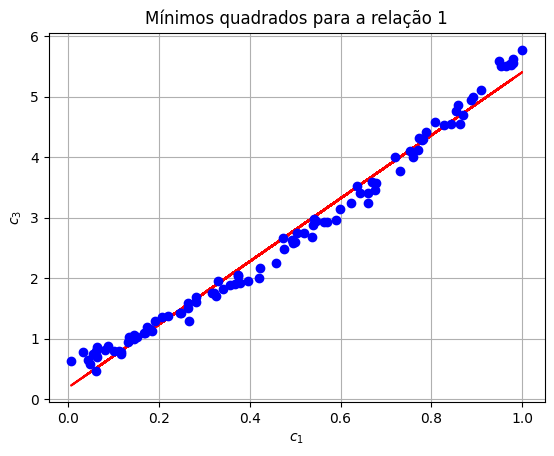

In [511]:
x,y=col1,col3
k=returnk_rel1(x,y)
yval=np.polyval(k,x)

plt.plot(x,yval,'-r',
         x,y,'ob')
plt.grid()
plt.title('Mínimos quadrados para a relação 1')
plt.xlabel('$c_1$')
plt.ylabel('$c_3$')
plt.show()

#### $c_3 ≈ 𝑘_1 + 𝑘_2 c_1 + 𝑘_3 c_1^2$

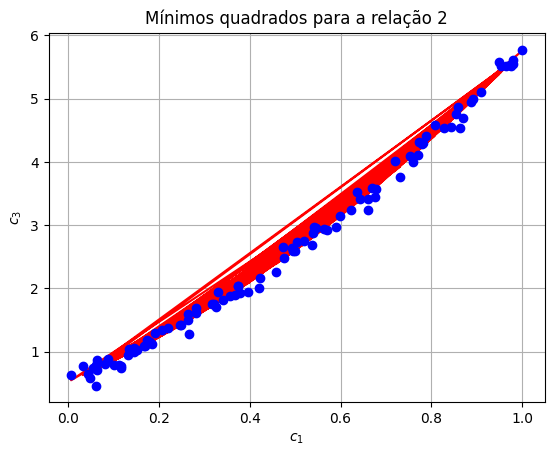

In [518]:
x,y=col1,col3
k=returnk_rel2(x,y)
yval=np.polyval(k,x)

plt.plot(x,yval,'-r',
         x,y,'ob')
plt.grid()
plt.title('Mínimos quadrados para a relação 2')
plt.xlabel('$c_1$')
plt.ylabel('$c_3$')
plt.show()

### $c_4 ≈ 𝑘_1 + 𝑘_2 c_1 + 𝑘_3 c_2$

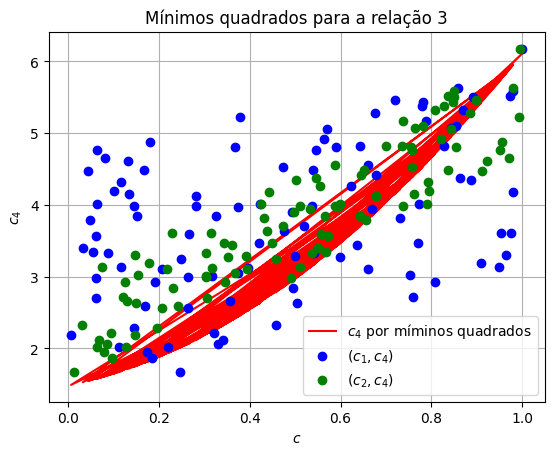

In [513]:
x1,x2,y=col1,col2,col4
k=returnk_rel3(x1,x2,y)
yval=np.polyval(k,x1)

plt.plot(x1,yval,'-r',
         x1,y,'ob',
         x2,y,'og')
plt.grid()
plt.title('Mínimos quadrados para a relação 3')
plt.xlabel('$c$')
plt.ylabel('$c_4$')
plt.legend(['$c_4$ por míminos quadrados','$(c_1,c_4)$','$(c_2,c_4)$'])
plt.show()